In [85]:
import pandas as pd

import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [86]:
path = './'
df = pd.read_csv(path + "telco_2yr.csv")

In [87]:
df.shape

(1695, 4)

In [88]:
df = df.convert_objects(convert_numeric=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [89]:
df.dtypes #customer_id is a string

customer_id         object
tenure               int64
monthly_charges    float64
total_charges      float64
dtype: object

In [90]:
df.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.30
1688,9958-MEKUC,72,103.95,7517.70
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.40
1691,9972-EWRJS,67,19.25,1372.90
1692,9975-GPKZU,46,19.75,856.50
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.60


In [91]:
#What is the inner quartile range of tenure? monthly charges? total charges?
# df.describe()
df.describe().quantile(.75)-df.describe().quantile(.25)

tenure               30.697659
monthly_charges      65.509601
total_charges      2713.212960
dtype: float64

In [92]:
df.describe()

,tenure,monthly_charges,total_charges
count,1695.000000,1695.000000,1685.000000
mean,56.735103,60.770413,3728.933947
std,18.209363,34.678865,2571.252806
min,0.000000,18.400000,20.350000
25%,48.000000,24.025000,1278.800000
50%,64.000000,64.350000,3623.950000
75%,71.000000,90.450000,5999.850000
max,72.000000,118.750000,8672.450000


In [93]:
df = df.fillna(0) #10 rows were missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.0+ KB


(array([644.,  75., 186., 270., 235., 285.]),
 array([ 18.4  ,  35.125,  51.85 ,  68.575,  85.3  , 102.025, 118.75 ]),
 <a list of 6 Patch objects>)

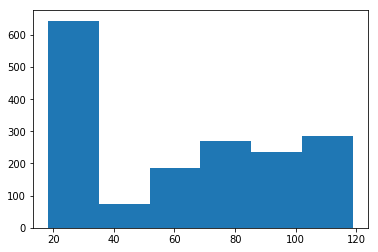

In [94]:
plt.hist(df.monthly_charges, bins=6)

In [95]:
#Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.
df2 = df[['tenure', 'monthly_charges', 'total_charges']]
df2

,tenure,monthly_charges,total_charges
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75
5,72,101.30,7261.25
6,56,45.05,2560.10
7,71,95.75,6849.40
8,54,20.40,1090.60
9,69,19.70,1396.90


create a box plot of each variable in your new dataframe. This should be a single chart with 3 categorical plots, 1 each for tenure, monthly charges, total charges.

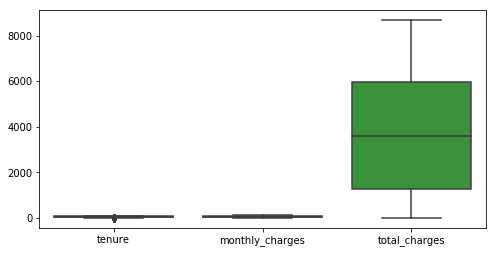

In [96]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df2)

Split your data into a test and train dataset. Set the random_state to 123. You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [97]:
X = df.drop(['total_charges'], axis=1) #make sure to use capital X
y = df[['total_charges']] #y is dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1) #axis = columns
test = pd.concat([X_test, y_test], axis=1)

Create a scatterplot for each combination of variables.

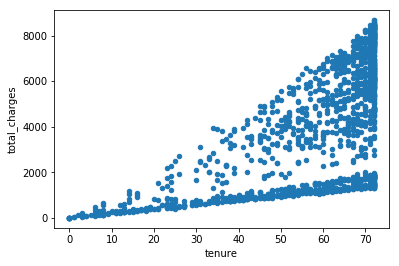

In [98]:
train.plot.scatter(x='tenure', y='total_charges')

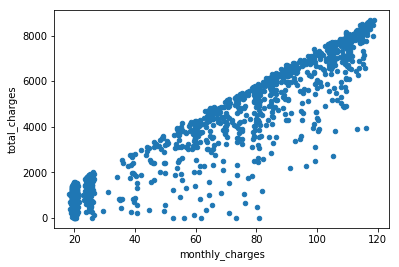

In [99]:
train.plot.scatter(x='monthly_charges', y='total_charges')

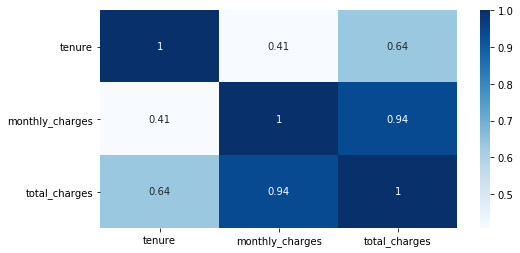

In [100]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is ____ with a significance p-value of ____"

In [102]:
pearson_r = [[column, pearsonr(train[column], train.total_charges)] for column in X_train]

TypeError: unsupported operand type(s) for /: 'str' and 'int'